<a href="https://colab.research.google.com/github/DoSiHoai/DoSiHoai_20146491_AI_2023/blob/main/Conlacnguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b2328ae4dbeccec0ce9bec12069286667260c482b71037f763a30264af9e96bf
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-19-4d255b52ba3a>:38: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-19-4d255b52ba3a>:39: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-19-4d255b52ba3a>:40: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


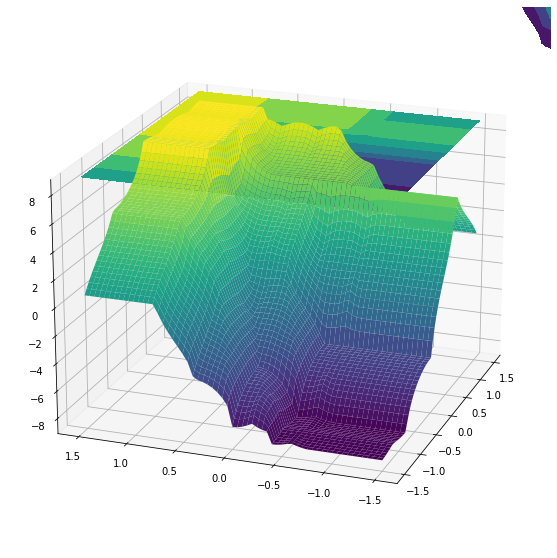

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
universe = np.linspace(-np.pi/2,np.pi/2, 61)
universe1 = np.linspace(-np.pi/4, np.pi/4, 61)
universe2 = np.linspace(-10, 10, 61)
anpha = ctrl.Antecedent(universe, 'anpha')
danpha = ctrl.Antecedent(universe1, 'danpha')
F = ctrl.Consequent(universe2, 'F')
names1 = ['AL', 'A', 'ZE', 'D', 'DL']
names2 = ['-2', '-1', '0', '1', '2']
anpha.automf(names = names1)
danpha.automf(names =names2)
F.automf(names = names1)

rule0 = ctrl.Rule(antecedent = ((anpha['AL']&danpha['-2'])|(anpha['AL']&danpha['-1'])|(anpha['AL']&danpha['0']|(anpha['A']&danpha['-2'])|(anpha['A']&danpha['-1']))), consequent = F['AL'], label = 'ruleAL')
rule1 = ctrl.Rule(antecedent = ((anpha['AL']&danpha['1'])|(anpha['A']&danpha['0'])|(anpha['ZE']&danpha['-2']|(anpha['ZE']&danpha['-1']))), consequent = F['A'], label = 'ruleA')
rule2 = ctrl.Rule(antecedent = ((anpha['AL']&danpha['2'])|(anpha['A']&danpha['1'])|(anpha['ZE']&danpha['1']|(anpha['ZE']&danpha['0'])|(anpha['DL']&danpha['-2']))), consequent = F['ZE'], label = 'ruleZE')
rule3 = ctrl.Rule(antecedent = ((anpha['A']&danpha['2'])|(anpha['D']&danpha['-2'])|(anpha['D']&danpha['-1']|(anpha['D']&danpha['0'])|(anpha['D']&danpha['1'])|(anpha['DL']&danpha['-1']))), consequent = F['D'], label = 'ruleD')
rule4 = ctrl.Rule(antecedent = ((anpha['DL']&danpha['2'])|(anpha['DL']&danpha['1'])|(anpha['DL']&danpha['0']|(anpha['ZE']&danpha['2'])|(anpha['D']&danpha['2']))), consequent = F['DL'], label = 'ruleDL')

system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-1.5, 1.5, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['anpha'] = x[i,j]
    sim.input['danpha'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['F']
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(20,200)

In [ ]:
Force_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
Force = ctrl.ControlSystemSimulation(Force_ctrl)
Force.input['anpha'] = 1.2
Force.input['danpha'] = 0.3
Force.compute()
print(Force.output['F'])
F.view(sim = Force)
